In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\Desktop\\summer_term\\Project\\pro\\housing.csv")

print(df)
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

df["total_bedrooms"] = df["total_bedrooms"].dropna()

df['area_density'] = df['population']/df['households']
print(df['area_density'])

income_category = []
for i in df['median_income']:
    if i<=4:
        income_category.append("Low Income")
    elif i>4 and i<=6.5:
        income_category.append("Moderate Income")
    else:
        income_category.append("High Income")
df["income_category"] = income_category
print(df["income_category"])
print(df)


house_age_category = []
for i in df['housing_median_age']:
    if i<=10:
        house_age_category.append("New House")
    elif i>10 and i<=30:
        house_age_category.append("Middle aged House")
    else:
        house_age_category.append("Old House")
df["house_age_category"] = house_age_category
print(df["house_age_category"])
print(df)

df.to_csv("C:\\Users\\HP\\OneDrive\\Documents\\Desktop\\summer_term\\Project\\pro\\finalise.csv")


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

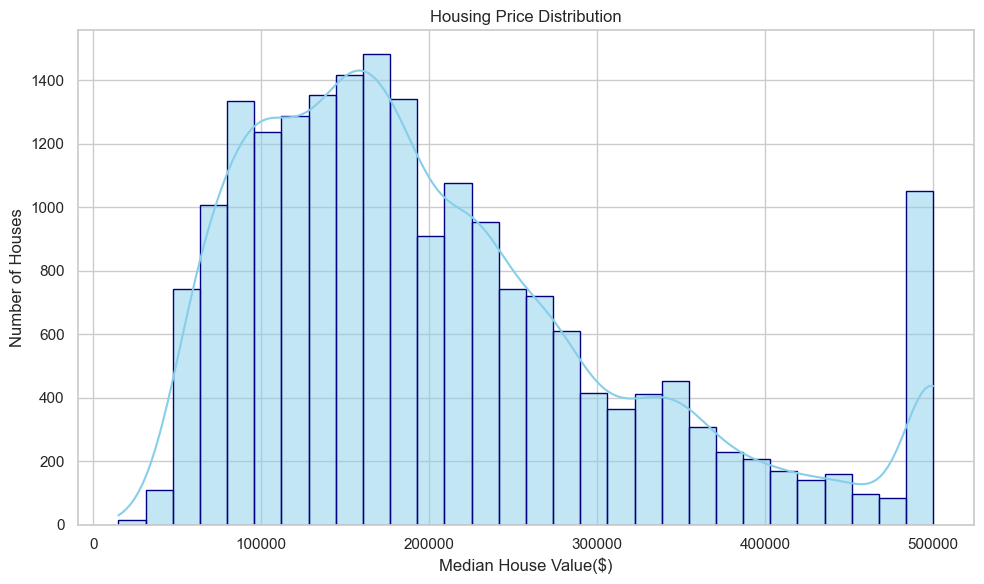

In [5]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(df['median_house_value'],bins=30,kde=True,color='skyblue',edgecolor='navy')
plt.title("Housing Price Distribution")
plt.xlabel("Median House Value($)")
plt.ylabel("Number of Houses")
plt.tight_layout()

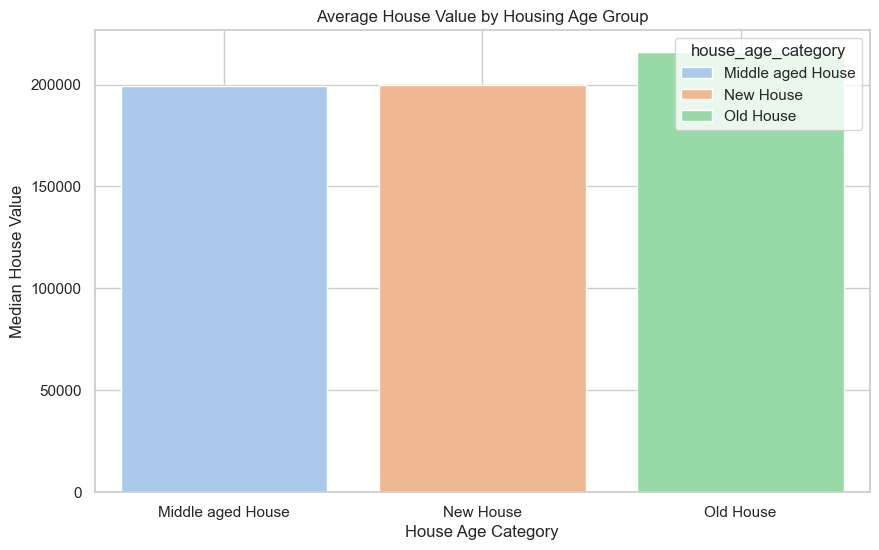

In [6]:
plt.figure(figsize=(10,6))
avg_house_price = df.groupby('house_age_category')["median_house_value"].mean().reset_index()
sns.barplot(avg_house_price,x='house_age_category',y='median_house_value',hue='house_age_category',palette="pastel",legend=True)
plt.title("Average House Value by Housing Age Group")
plt.xlabel("House Age Category")
plt.ylabel("Median House Value")
plt.grid(True)

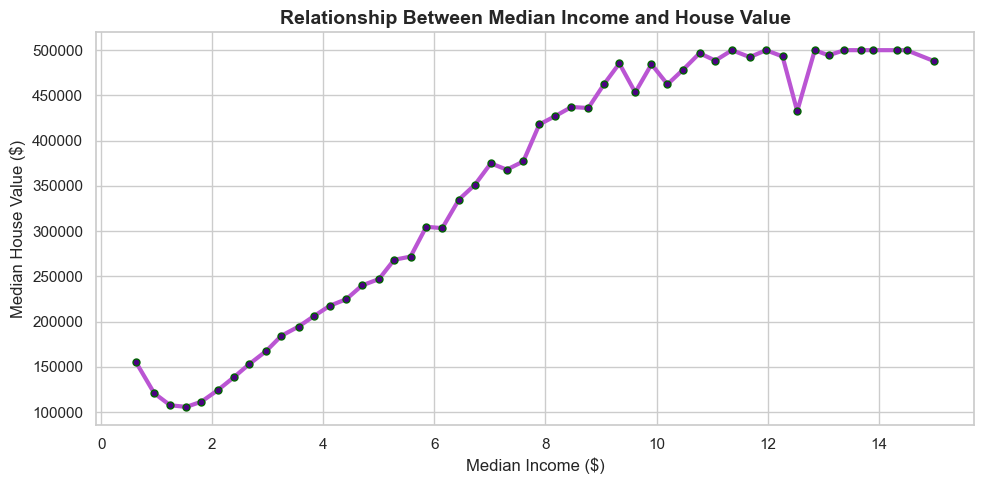

In [7]:
plt.figure(figsize=(10, 5))
df_line = df.copy()
df_line['income_bin'] = pd.cut(df_line['median_income'], bins=50)
binned = df_line.groupby('income_bin', observed=False)[['median_income', 'median_house_value']].mean().reset_index()
sns.lineplot(data=binned, x='median_income', y='median_house_value', color='mediumorchid', marker='o',markersize = 5, markerfacecolor='indigo', markeredgewidth=1, markeredgecolor='darkgreen', linewidth=3)
plt.title("Relationship Between Median Income and House Value", fontsize=14,fontweight='bold')
plt.xlabel("Median Income ($)")
plt.ylabel("Median House Value ($)")
plt.tight_layout()

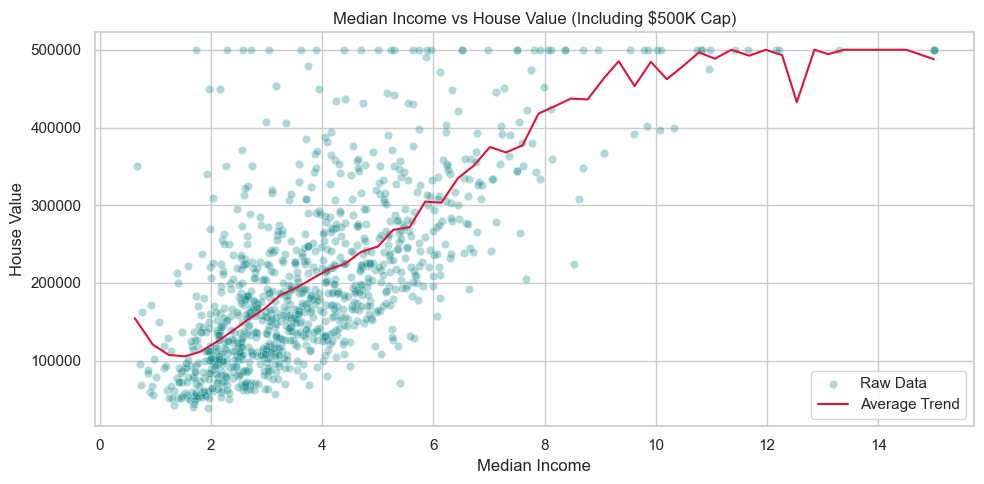

In [8]:
df_line = df.copy()

df_line['income_bin'] = pd.cut(df_line['median_income'], bins=50)

binned_avg = df_line.groupby('income_bin', observed=False)[['median_income', 'median_house_value']].mean().reset_index()

plt.figure(figsize=(10, 5))

sns.scatterplot(data=df_line.sample(1000), x='median_income', y='median_house_value', color='teal', alpha=0.3, label='Raw Data')
sns.lineplot(data=binned_avg, x='median_income', y='median_house_value', color='crimson', label='Average Trend')
plt.title("Median Income vs House Value (Including $500K Cap)")

plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


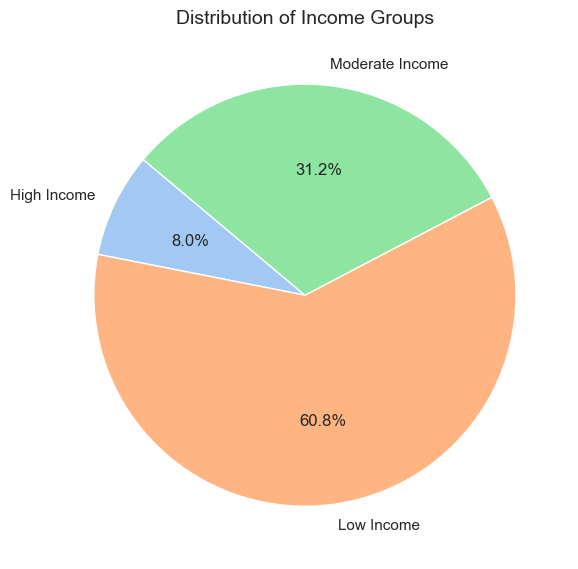

In [9]:
# Count income group occurrences
income_counts = df['income_category'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(income_counts,labels=income_counts.index, autopct='%1.1f%%',startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Income Groups", fontsize=14)
plt.tight_layout()
plt.show()

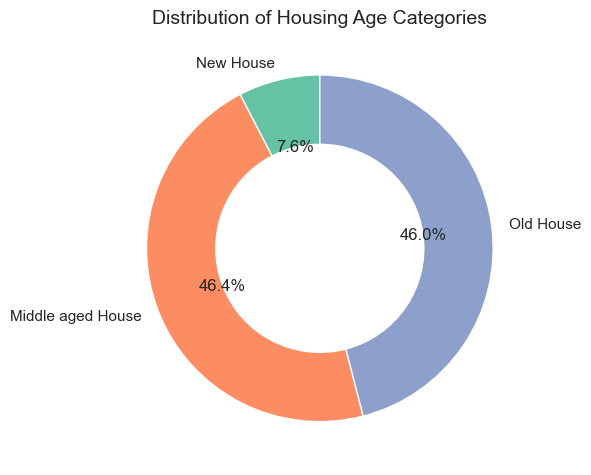

In [10]:

age_counts = df['house_age_category'].value_counts().reindex(['New House', 'Middle aged House', 'Old House']).dropna()

# Donut Chart
plt.figure(figsize=(6, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'), wedgeprops={'width': 0.4})
plt.title("Distribution of Housing Age Categories", fontsize=14)
plt.tight_layout()
plt.show()

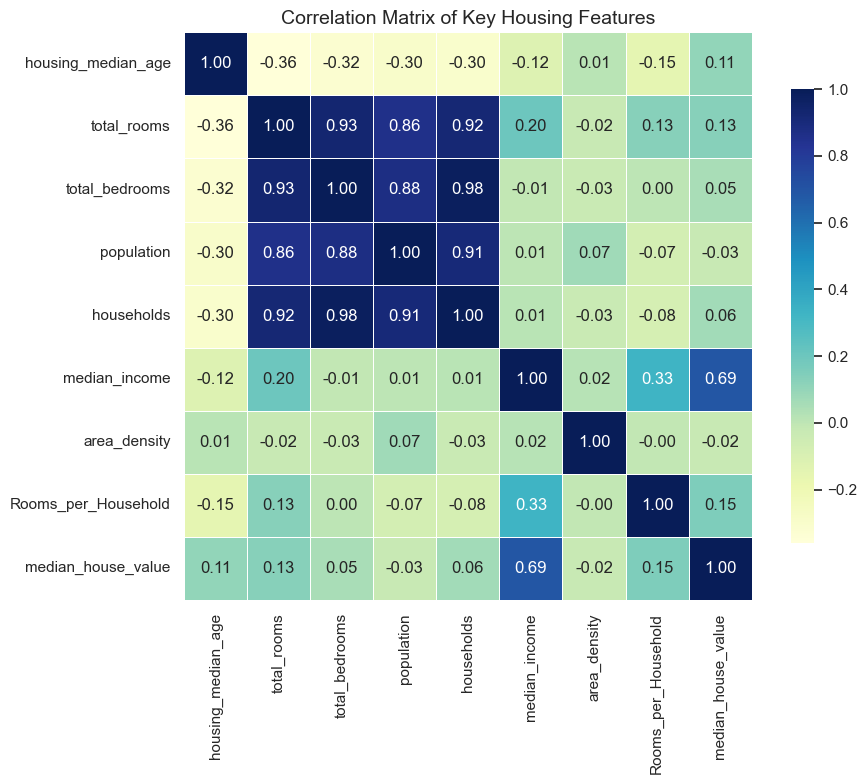

In [11]:
df['Rooms_per_Household'] = df['total_rooms'] / df['households']

# Feature list
cols = [
    'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income', 'area_density', 'Rooms_per_Household',
    'median_house_value'
]

# Filter available columns only (handles any typos or missing columns)
available_cols = [col for col in cols if col in df.columns]

# Drop NA rows in those columns
corr_df = df[available_cols].dropna()

# Compute correlation matrix
correlation = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Matrix of Key Housing Features", fontsize=14)
plt.tight_layout()
plt.show()


Column: longitude
  - Lower Bound: -127.48
  - Upper Bound: -112.33
  - Outliers: 0 (0.00%)

Column: latitude
  - Lower Bound: 28.25
  - Upper Bound: 43.41
  - Outliers: 0 (0.00%)

Column: housing_median_age
  - Lower Bound: -10.50
  - Upper Bound: 65.50
  - Outliers: 0 (0.00%)

Column: total_rooms
  - Lower Bound: -1089.50
  - Upper Bound: 5682.50
  - Outliers: 1290 (6.31%)

Column: total_bedrooms
  - Lower Bound: -230.50
  - Upper Bound: 1173.50
  - Outliers: 1271 (6.22%)

Column: population
  - Lower Bound: -615.50
  - Upper Bound: 3124.50
  - Outliers: 1190 (5.82%)

Column: households
  - Lower Bound: -206.00
  - Upper Bound: 1090.00
  - Outliers: 1210 (5.92%)

Column: median_income
  - Lower Bound: -0.71
  - Upper Bound: 8.01
  - Outliers: 670 (3.28%)

Column: median_house_value
  - Lower Bound: -98300.00
  - Upper Bound: 482500.00
  - Outliers: 1064 (5.21%)



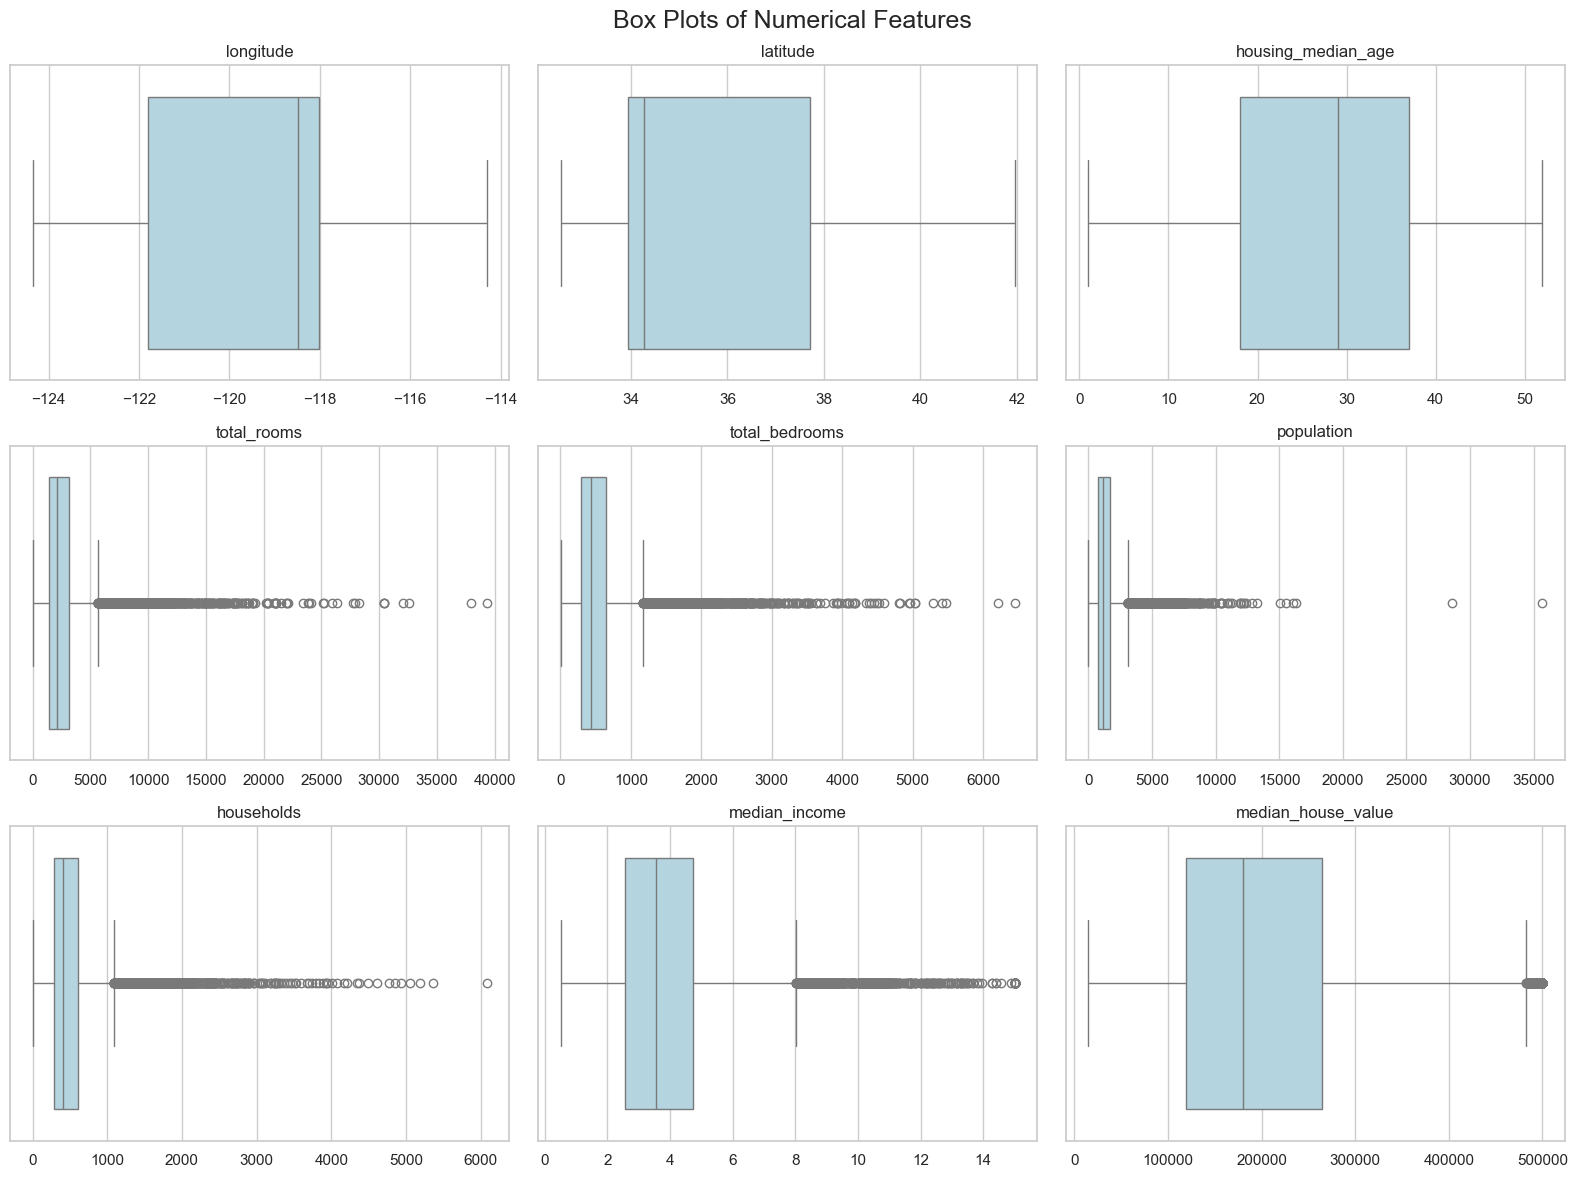

In [12]:
exclude_cols = ['area_density', 'Rooms_per_Household']
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]

plt.figure(figsize=(16, 12))
plt.suptitle("Box Plots of Numerical Features", fontsize=18)

for i, col in enumerate(numerical_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"  - Lower Bound: {lower_bound:.2f}")
    print(f"  - Upper Bound: {upper_bound:.2f}")
    print(f"  - Outliers: {len(outliers)} ({(len(outliers) / len(df)) * 100:.2f}%)\n")

    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()